In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls "gdrive/My Drive"

 Classroom  'Colab Notebooks'   haberman.csv   kaggle.json


In [0]:
data = pd.read_csv('gdrive/My Drive/haberman.csv')

In [5]:
print(data.head())

   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1


In [0]:
data = pd.read_csv('gdrive/My Drive/haberman.csv', header=None, names=['Age', 'Year of treatment _19_',
                                                                      'Positive axillary nodes detected',
                                                                      'Survival Status after 5 year'])# survival status 1=survied;2=not survived

In [7]:
data.head()

,Age,Year of treatment _19_,Positive axillary nodes detected,Survival Status after 5 year
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                                 306 non-null int64
Year of treatment _19_              306 non-null int64
Positive axillary nodes detected    306 non-null int64
Survival Status after 5 year        306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [9]:
list(data['Survival Status after 5 year'].unique())

[1, 2]

1 = Survived
2 = Not survived

In [10]:
data.describe()

,Age,Year of treatment _19_,Positive axillary nodes detected,Survival Status after 5 year
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#Univariate Analysis

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


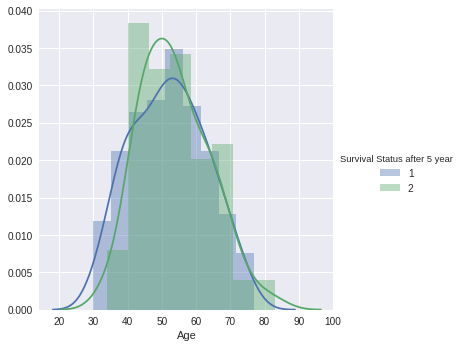

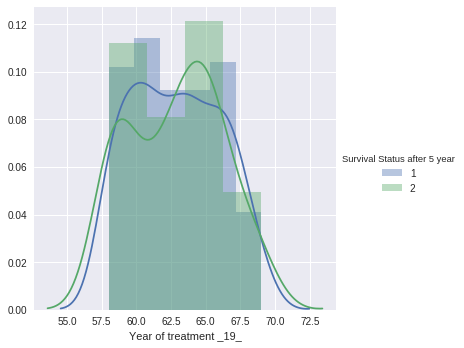

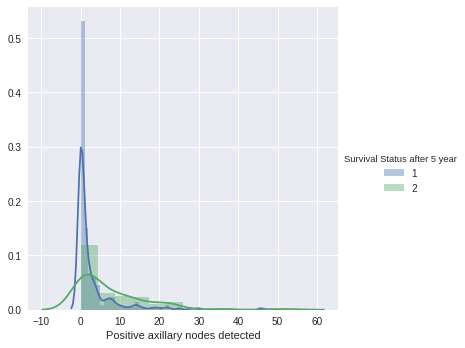

In [11]:
#histograms
for idx, feature in enumerate(list(data.columns)[:-1]):#for every coloum
    fg = sns.FacetGrid(data, hue='Survival Status after 5 year', size=5)#hue=key
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

###Observations
1. Age and Year of treatment dont give much information about survival status.<br>
2. Positive axillary nodes detected feild sperates data a bit but not enough to get some useful information



##CDF

********* Age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* Year of treatment _19_ *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* Positive axillary nodes detected *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.

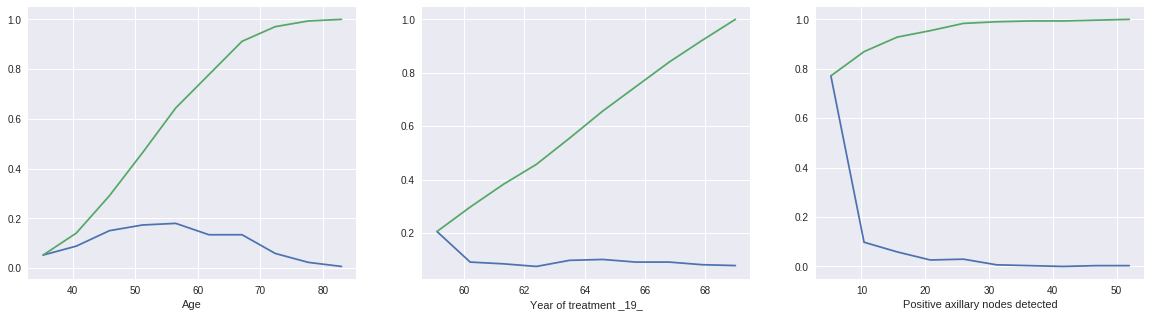

In [12]:
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(data[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

##Box Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


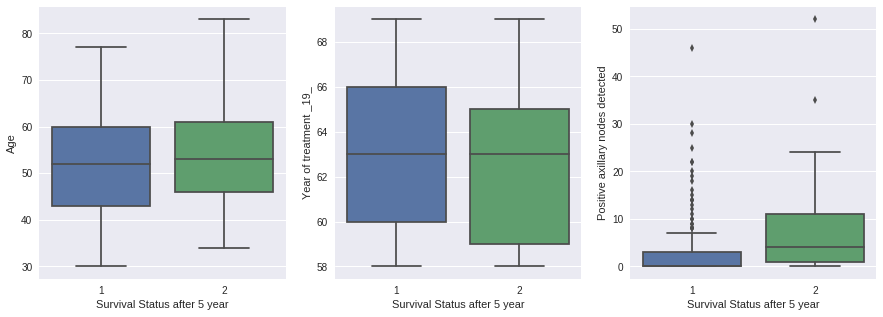

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    sns.boxplot( x='Survival Status after 5 year', y=feature, data=data, ax=axes[idx])
plt.show()

##Voilin Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


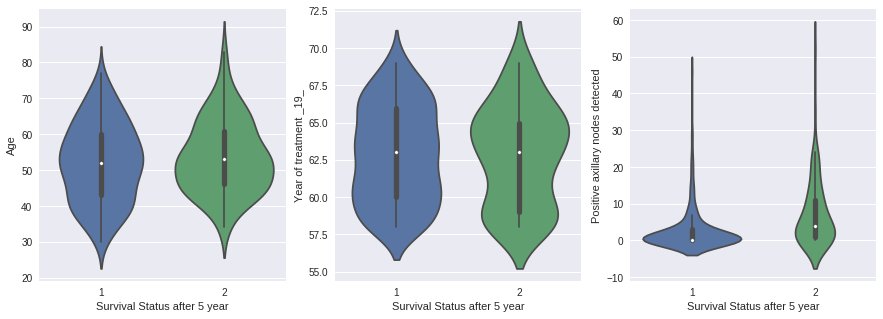

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    sns.violinplot( x='Survival Status after 5 year', y=feature, data=data, ax=axes[idx])
plt.show()

###Observations
1. With less Positive axillary nodes detected patient has higher chance of survival as voilin plot is more dense near to zero mark.<br>
2. People treated in between year 1960-1963 comparitively had higher survival chance.

##Multivariate Analysis

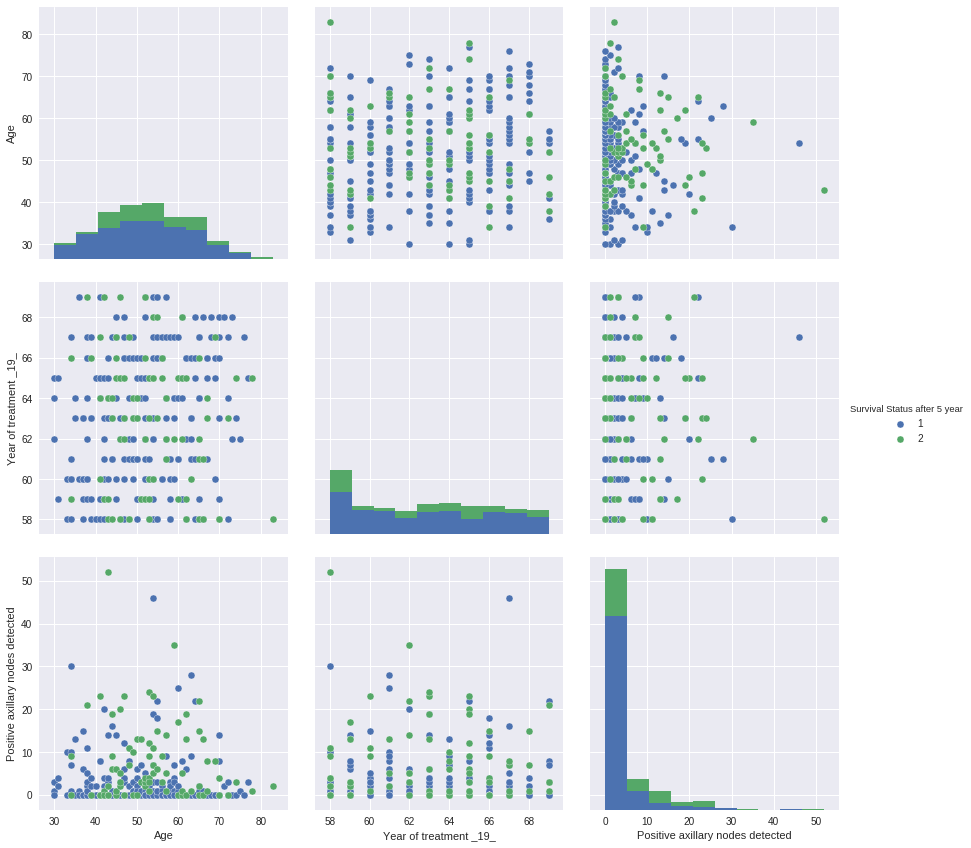

In [18]:
sns.pairplot(data, hue='Survival Status after 5 year', vars=['Age', 'Year of treatment _19_', 
                                                             'Positive axillary nodes detected'], size=4)
plt.show()

###Observation
1. Data is quite random on using multivariable, almost no conclusion can be made from it.

Reference:
https://www.kaggle.com/gokulkarthik/haberman-s-survival-exploratory-data-analysis